In [4]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import random
import pandas as pd
import simpy
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# The areas in the supermarket
areas = ["entrance", "fruit", "spices", "dairy", "drinks", "checkout"]

# Read the transition probabilities for each area from a CSV file
transition_probabilities = pd.read_csv("transition_probs.csv", index_col=0)

# The transition probabilities for each area in a dataframe
# transition_probabilities = pd.DataFrame(
#     [[0.5, 0.5, 0, 0, 0, 0],
#      [0, 0.5, 0.5, 0, 0, 0],
#      [0, 0.5, 0, 0.5, 0, 0],
#      [0, 0, 0, 0, 0.5, 0.5],
#      [0, 0, 0, 0, 0, 1.0],
#      [0, 0, 0, 0, 0, 0]],
#     index=areas,
#     columns=areas
# )




# The number of customers to simulate
num_customers = 20

# The maximum number of steps to simulate for each customer
max_steps = 1000

# A list to store the paths taken by each customer
customer_paths = []

# Load the picture of the market
market_img = plt.imread("market.png")

# Define the locations of the areas in the supermarket
area_locations = {
    "entrance": (850, 550),
    "fruit": (850, 250),
    "spices": (590, 250),
    "dairy": (390, 250),
    "drinks": (100, 250),
    "checkout": (200, 610)}

# The number of test-steps to take between each area
# area_locations = {
#     "entrance": (0, 0),
#     "fruit": (100, 0),
#     "spices": (200, 0),
#     "dairy": (300, 0),
#     "drinks": (400, 0),
#     "checkout": (500, 0)
# }



# Create the SimPy environment
#env = simpy.Environment()
                            


In [6]:
#area_locations['entrance']
#area_locations.get('entrance')
area_locations.get('entrance')[0]

850

In [7]:
transition_probabilities.head()

,checkout,dairy,drinks,fruit,spices,exit
dairy,0.103313,0.737023,0.058546,0.049772,0.051347,0
drinks,0.215630,0.010900,0.598560,0.087918,0.086992,0
entrance,0.000537,0.287441,0.153392,0.377300,0.181330,0
fruit,0.201558,0.095744,0.054834,0.597199,0.050665,0
spices,0.150526,0.193214,0.163109,0.090953,0.402198,0


In [8]:


# Define a process for each customer
def customer_process(env, i):
    # The current area of the customer
    current_area = "entrance"
    # The path taken by the customer
    path = [current_area]
    print("Customer {} enters the supermarket at {}".format(i, path))
    # Simulate the movement of the customer for a maximum number of steps
    for j in range(max_steps):
        # If the customer has reached the checkout, they have left the store
        if current_area == "checkout":
            print("Customer {} has left the supermarket after this journey: {}".format(i, path))
            break
        
        # Choose the next area for the customer based on the transition probabilities
        next_area = random.choices(list(transition_probabilities.loc[current_area].index), 
                                   weights=list(transition_probabilities.loc[current_area].values))[0]
        path.append(next_area)
        current_area = next_area
        #print(f'Customer {i} is in area check: {current_area}')
        
        yield env.timeout(10) # Wait for 10 time units before moving to the next area
    
    # Add the path taken by the customer to the list of customer paths
    customer_paths.append(path)
    print(f'Customer {i} is in area: {current_area}')
    print(f'Customer {i} is in area: {path}')
    #print(customer_paths)

    return customer_paths, path #, current_area
    




In [9]:
#print(customer_paths)

In [10]:




# Define a function to animate the paths taken by each customer

def animate_customer_paths(env, customer_paths, max_steps, area_locations, market_img):
    # Visualize the paths taken by each customer
    fig, ax = plt.subplots()
    ax.imshow(market_img)
    #ax.axis("off")

    #print(f'customer_paths: {customer_paths}')

    # Initialize the plot with the first step of each customer's path = entrance
    scatters = []
    for i, path in enumerate(customer_paths): 
        #print(f'path 0: {path[0]}, index: {i}')                # translation into coordinates runs not properly
        #x_coords = [areas.index(path[0])]
        #print(f'x_coords: {x_coords}')
        x_coords = [area_locations[path[0]][0]]
        #print(f'x_coords: {x_coords}')
        
        y_coords = [area_locations[path[0]][1]]
        #y_coords = [i]
        #print(f' y_coords: {y_coords}')
        scatter = ax.scatter(x_coords, y_coords, color="red")
        
        scatters.append(scatter)
        #plt.show() # start the animation in entry area


        
    # Define the animation function
    def animate(i):
        # Update the positions of the points on the plot
        for j, path in enumerate(customer_paths):
            #print(f'animate path: {path}, index: {j}')
            # Only update the position if the customer has moved to a new area
            if len(path) > i:
                # If the customer has reached the checkout, set their position to the checkout
                if path[i] == "checkout":
                    scatters[j].set_offsets([area_locations["checkout"]])
                    #scatters[j].set_offsets([(areas.index("entrance"), j)])
                    #scatters[j].set_offsets([(area_locations("checkout"), j)])
                else:
                    scatters[j].set_offsets([area_locations[path[i]]])
                    #scatters[j].set_offsets([(areas.index(path[i]), j)])
                    
                    
        return scatters
    
    # Create the animation
    anim = animation.FuncAnimation(fig, animate, frames=max_steps, interval=100, blit=True, repeat=False)
    #return anim
    plt.show()
    # Print the arguments of the animation function
    #print(f'fig:{fig}',f'animate:{animate}', f'frames:{max_steps}', f'interval:{100}', f'blit:{True}', f'repeat:{False}')

    

area_locations: {'entrance': (850, 550), 'fruit': (850, 250), 'spices': (590, 250), 'dairy': (390, 250), 'drinks': (100, 250), 'checkout': (200, 610)}
------------------------------------------------------
customer_paths before animation: []


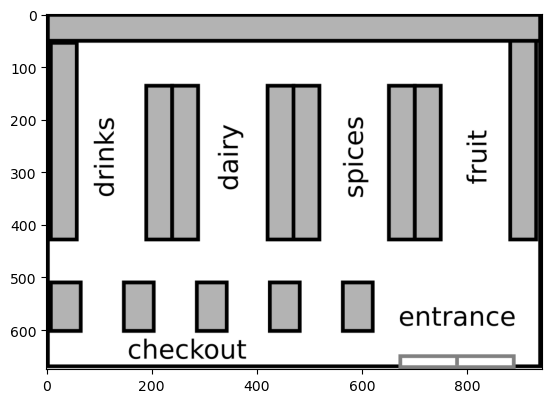

Customer 0 enters the supermarket at ['entrance']
Customer 1 enters the supermarket at ['entrance']
Customer 2 enters the supermarket at ['entrance']
Customer 3 enters the supermarket at ['entrance']
Customer 4 enters the supermarket at ['entrance']
Customer 5 enters the supermarket at ['entrance']
Customer 6 enters the supermarket at ['entrance']
Customer 7 enters the supermarket at ['entrance']
Customer 8 enters the supermarket at ['entrance']
Customer 9 enters the supermarket at ['entrance']
Customer 10 enters the supermarket at ['entrance']
Customer 11 enters the supermarket at ['entrance']
Customer 12 enters the supermarket at ['entrance']
Customer 13 enters the supermarket at ['entrance']
Customer 14 enters the supermarket at ['entrance']
Customer 15 enters the supermarket at ['entrance']
Customer 16 enters the supermarket at ['entrance']
Customer 17 enters the supermarket at ['entrance']
Customer 18 enters the supermarket at ['entrance']
Customer 19 enters the supermarket at ['e

In [11]:
# Create the SimPy environment
env = simpy.Environment()

# Create a process for each customer
for i in range(num_customers):
    env.process(customer_process(env, i))

    # # Determine the maximum number of steps for the animation
    # if customer_paths:
    #     max_steps = max(len(path) for path in customer_paths)
    # else:
    #     max_steps = 0
    #     print("No customer paths found")


print(f'area_locations: {area_locations}')
print('------------------------------------------------------')
print(f'customer_paths before animation: {customer_paths}')

# Run the simulation and animation
animate_customer_paths(env,customer_paths, max_steps, area_locations, market_img)


env.run()       # run the simulation
